In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [24]:
air = pd.read_csv('/kaggle/input/playground-series-s3e20/train.csv')

In [10]:
# EDA - look at the shape of the dataset
air.shape

(79023, 76)

In [11]:
air.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [8]:
# Understand data types
pd.set_option('display.max_rows', None)
air.dtypes

ID_LAT_LON_YEAR_WEEK                                         object
latitude                                                    float64
longitude                                                   float64
year                                                          int64
week_no                                                       int64
SulphurDioxide_SO2_column_number_density                    float64
SulphurDioxide_SO2_column_number_density_amf                float64
SulphurDioxide_SO2_slant_column_number_density              float64
SulphurDioxide_cloud_fraction                               float64
SulphurDioxide_sensor_azimuth_angle                         float64
SulphurDioxide_sensor_zenith_angle                          float64
SulphurDioxide_solar_azimuth_angle                          float64
SulphurDioxide_solar_zenith_angle                           float64
SulphurDioxide_SO2_column_number_density_15km               float64
CarbonMonoxide_CO_column_number_density         

In [9]:
# Understand the target variable
air['emission'].describe()

count    79023.000000
mean        81.940552
std        144.299648
min          0.000000
25%          9.797995
50%         45.593445
75%        109.549595
max       3167.768000
Name: emission, dtype: float64

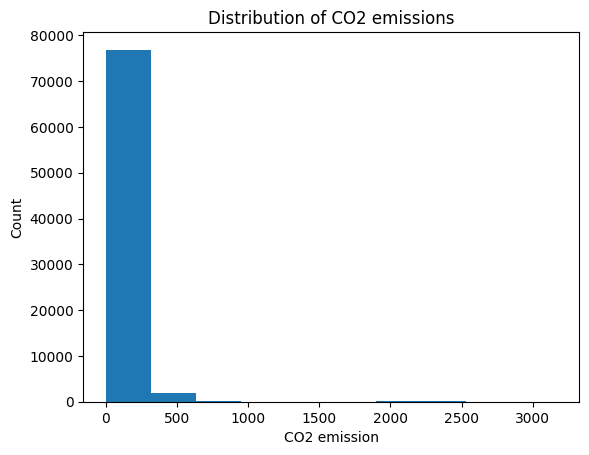

In [25]:
# Visualize the target variable
import matplotlib
from matplotlib import pylab as plt
air['emission'].plot.hist()
plt.xlabel('CO2 emission')
plt.ylabel('Count')
plt.title('Distribution of CO2 emissions')
plt.show()

From the above plot, we can see that the CO2 emission is skewed and follows a long tail distribution

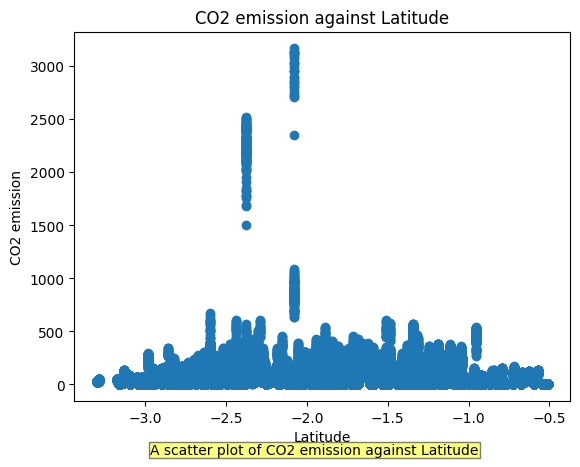

In [18]:
# CO2 against latitude
plt.scatter(air['latitude'], air['emission'])
plt.title('CO2 emission against Latitude')
plt.xlabel('Latitude')
plt.ylabel('CO2 emission')
#Add caption
plt.figtext(0.5, 0.0001, "A scatter plot of CO2 emission against Latitude", ha='center', bbox={"facecolor":"yellow", "alpha":0.5, "pad":1})
plt.show()

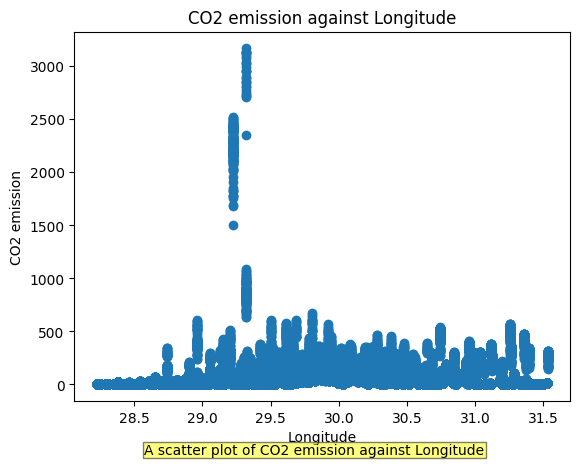

In [19]:
# CO2 against latitude
plt.scatter(air['longitude'], air['emission'])
plt.title('CO2 emission against Longitude')
plt.xlabel('Longitude')
plt.ylabel('CO2 emission')
#Add caption
plt.figtext(0.5, 0.0001, "A scatter plot of CO2 emission against Longitude", ha='center', bbox={"facecolor":"yellow", "alpha":0.5, "pad":1})
plt.show()

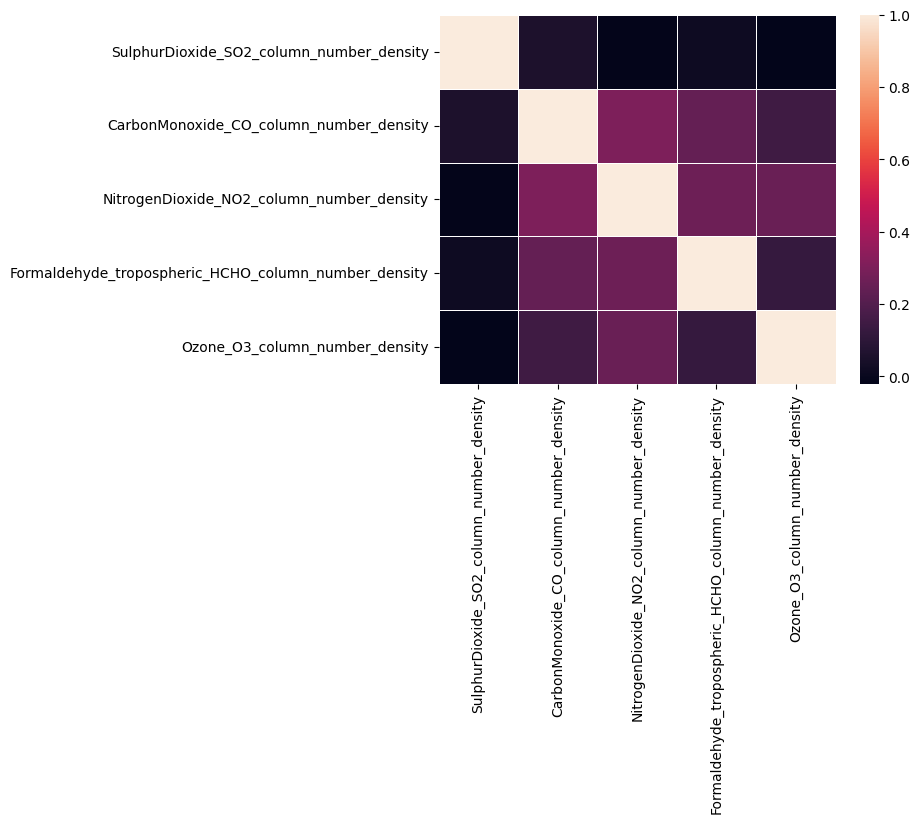

In [27]:
# Heatmap to understand correlation between density of gases
import seaborn as sns
#seaborn.heatmap(df[['SulphurDioxide_SO2_column_number_density', 'CarbonMonoxide_CO_column_number_density', 'NitrogenDioxide_NO2_column_number_density', 'Formaldehyde_tropospheric_HCHO_column_number_density', 'Ozone_O3_column_number_density']])
density = air[['SulphurDioxide_SO2_column_number_density', 'CarbonMonoxide_CO_column_number_density', 'NitrogenDioxide_NO2_column_number_density', 'Formaldehyde_tropospheric_HCHO_column_number_density', 'Ozone_O3_column_number_density']].corr()
ax = sns.heatmap(density, linewidth=0.5)

In [28]:
# Splitting and preprocessing data
# Separate features and target variable
air_features = air.iloc[:, 0:-1]
emission = air.iloc[:, -1]

In [33]:
from sklearn.model_selection import train_test_split
# As the dataset already splitted the data into train & test, only splitting between train and validation sets are necessary
air_features_train, air_features_val, emission_train, emission_val = train_test_split(air_features,emission,train_size=0.75)

In [35]:
# checking the shape of training set
# should be 75% of original train set with 1 less column (target)
air_features_train.shape

(59267, 75)

In [36]:
# checking the shape of validation set
# should be 25% of original train set with 1 less column (target)
air_features_val.shape

(19756, 75)

In [38]:
# check for missing values
air.isna().sum()

ID_LAT_LON_YEAR_WEEK                                            0
latitude                                                        0
longitude                                                       0
year                                                            0
week_no                                                         0
SulphurDioxide_SO2_column_number_density                    14609
SulphurDioxide_SO2_column_number_density_amf                14609
SulphurDioxide_SO2_slant_column_number_density              14609
SulphurDioxide_cloud_fraction                               14609
SulphurDioxide_sensor_azimuth_angle                         14609
SulphurDioxide_sensor_zenith_angle                          14609
SulphurDioxide_solar_azimuth_angle                          14609
SulphurDioxide_solar_zenith_angle                           14609
SulphurDioxide_SO2_column_number_density_15km               14609
CarbonMonoxide_CO_column_number_density                      2122
CarbonMono

In [39]:
# check percentage of missing values
100*air.isna().sum()/len(air)

ID_LAT_LON_YEAR_WEEK                                         0.000000
latitude                                                     0.000000
longitude                                                    0.000000
year                                                         0.000000
week_no                                                      0.000000
SulphurDioxide_SO2_column_number_density                    18.487023
SulphurDioxide_SO2_column_number_density_amf                18.487023
SulphurDioxide_SO2_slant_column_number_density              18.487023
SulphurDioxide_cloud_fraction                               18.487023
SulphurDioxide_sensor_azimuth_angle                         18.487023
SulphurDioxide_sensor_zenith_angle                          18.487023
SulphurDioxide_solar_azimuth_angle                          18.487023
SulphurDioxide_solar_zenith_angle                           18.487023
SulphurDioxide_SO2_column_number_density_15km               18.487023
CarbonMonoxide_CO_co

In [52]:
# Preprocessing the training data
# As most of the data are continuous variables, Standard Scaler is suitable

# avoid columns that are categorical (year, week_no, ID)
cat_col_train = air_features_train[['ID_LAT_LON_YEAR_WEEK', 'year', 'week_no']]
std_col_train = air_features_train.drop(['ID_LAT_LON_YEAR_WEEK', 'year', 'week_no'], axis=1)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
air_features_train_std = scaler.fit_transform(std_col_train)

In [57]:
air_features_processed_train = pd.DataFrame(np.concatenate([cat_col_train, air_features_train_std], axis=1), columns=air_features_train.columns)
air_features_processed_train.rename(columns={'latitude': 'year', 'longitude': 'week_no', 'year': 'latitude', 'week_no': 'longitude'}, inplace=True)
air_features_processed_train.head()

,ID_LAT_LON_YEAR_WEEK,year,week_no,latitude,longitude,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-1.399_29.601_2019_08,2019,8,0.709058,-0.343596,0.295677,0.968298,0.462669,-0.623068,1.436835,...,0.048985,-1.595659,0.078977,-1.235121,-0.140523,0.019324,0.933728,-0.011567,-0.688494,-1.733676
1,ID_-2.489_28.811_2021_21,2021,21,-0.862126,-1.318941,1.620611,-0.826306,1.461816,-0.733151,1.003549,...,1.264585,-1.145306,1.155759,-1.019661,-1.065134,-0.263916,2.307874,-3.694643,1.187985,0.93838
2,ID_-1.065_31.035_2021_23,2021,23,1.190504,1.42684,-0.646566,1.36859,-0.872678,1.126984,1.288978,...,1.05112,-0.981416,1.14835,-1.067296,-0.99901,0.748711,-1.677462,-1.414228,1.154271,1.450638
3,ID_-2.056_30.544_2019_34,2019,34,-0.237976,0.820645,0.075271,0.163413,0.116028,-0.329064,1.297363,...,0.241201,-0.283773,0.298693,-0.327045,2.178,-1.129685,-0.474512,0.814946,0.689754,-0.304279
4,ID_-1.335_29.465_2021_48,2021,48,0.801311,-0.511503,NaN,NaN,NaN,NaN,NaN,...,0.614908,-0.621579,0.736906,-0.710977,-0.393995,0.865668,0.354025,0.700751,-1.230275,1.044583


In [56]:
# Preprocessing the validation data

cat_col_val = air_features_val[['ID_LAT_LON_YEAR_WEEK', 'year', 'week_no']]
std_col_val = air_features_val.drop(['ID_LAT_LON_YEAR_WEEK', 'year', 'week_no'], axis=1)
air_features_val_std = scaler.fit_transform(std_col_val)

In [58]:
air_features_processed_val = pd.DataFrame(np.concatenate([cat_col_val, air_features_val_std], axis=1), columns=air_features_val.columns)
air_features_processed_val.rename(columns={'latitude': 'year', 'longitude': 'week_no', 'year': 'latitude', 'week_no': 'longitude'}, inplace=True)
air_features_processed_val.head()

,ID_LAT_LON_YEAR_WEEK,year,week_no,latitude,longitude,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-2.237_30.763_2020_47,2020,47,-0.495709,1.08468,0.180649,1.222039,0.137295,0.29151,-0.492899,...,-0.526164,0.723046,-0.525282,0.713409,0.324618,0.336202,-0.061975,-0.715752,-1.106609,0.827551
1,ID_-2.466_30.334_2021_02,2021,2,-0.824338,0.556071,-0.674142,-1.017124,-0.488887,0.197398,0.418026,...,-0.494902,0.51117,-0.489278,0.479503,0.044018,0.316663,0.879395,-0.853321,-1.392435,-0.497461
2,ID_-1.482_30.618_2020_49,2020,49,0.587765,0.906013,-0.168056,-0.683267,-0.160965,-0.160061,-1.409703,...,0.304718,-0.187492,0.295647,-0.203922,-0.660719,1.301211,-0.60962,1.502359,-1.205042,1.513337
3,ID_-2.946_30.454_2020_11,2020,11,-1.513169,0.703934,-0.106431,-0.425778,-0.098974,1.235439,-1.378474,...,-0.546221,0.500019,-0.50551,0.467797,0.10492,0.081066,-1.286613,0.493148,0.077936,-0.857118
4,ID_-1.196_30.404_2021_14,2021,14,0.998193,0.642325,-1.632673,-1.033567,-1.407288,0.21111,-1.398179,...,-0.561696,0.448262,-0.52153,0.413458,-0.640072,0.952704,-1.782474,-0.150279,0.415239,-0.313595


In [62]:
test = pd.read_csv('/kaggle/input/playground-series-s3e20/test.csv')

In [65]:
# Preprocessing the test data
cat_col_test = test[['ID_LAT_LON_YEAR_WEEK', 'year', 'week_no']]
std_col_test = test.drop(['ID_LAT_LON_YEAR_WEEK', 'year', 'week_no'], axis=1)
air_features_test_std = scaler.fit_transform(std_col_test)

In [67]:
air_features_processed_test = pd.DataFrame(np.concatenate([cat_col_test, air_features_test_std], axis=1), columns=test.columns)
air_features_processed_test.rename(columns={'latitude': 'year', 'longitude': 'week_no', 'year': 'latitude', 'week_no': 'longitude'}, inplace=True)
air_features_processed_test.head()

,ID_LAT_LON_YEAR_WEEK,year,week_no,latitude,longitude,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,2022,0,1.988534,-0.728253,NaN,NaN,NaN,NaN,NaN,...,-1.919882,1.892377,-1.955373,1.903406,-0.837675,-0.327072,-2.690528,-1.014707,-1.419048,1.303318
1,ID_-0.510_29.290_2022_01,2022,1,1.988534,-0.728253,1.891097,-0.603464,1.805421,-1.743214,0.996944,...,-0.442716,0.451547,-0.437662,0.439897,-0.551536,0.795929,-0.466502,0.369455,-1.575572,0.680922
2,ID_-0.510_29.290_2022_02,2022,2,1.988534,-0.728253,0.628419,-1.115595,0.569995,-0.743127,-0.764798,...,-2.142789,2.262286,-2.178836,2.279137,-0.608169,0.238373,1.757338,0.931335,-1.747982,-0.279259
3,ID_-0.510_29.290_2022_03,2022,3,1.988534,-0.728253,1.438202,-0.569231,1.378622,0.773957,0.936335,...,-0.169501,0.118493,-0.138814,0.101601,-0.525786,1.043937,-0.273342,0.32777,-1.474546,0.364326
4,ID_-0.510_29.290_2022_04,2022,4,1.988534,-0.728253,-1.412903,-1.26187,-1.136992,0.81558,0.996224,...,-0.672244,0.720874,-0.658643,0.713463,-0.419832,0.605039,0.095946,-1.583029,-1.48778,-0.384195
